# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Pulling Cities list using API
units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url +"units=" + units + "&appid=" + weather_api_key + "&q="

x=1
count=1
city_name=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

print("Beginning Data Retrieval")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data = requests.get(query_url + city).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Data Retrieval Complete ")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Beginning Data Retrieval
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Processing Record 1 of set 1|kapaa
Processing Record 2 of set 1|barrow
Processing Record 3 of set 1|vaini
Processing Record 4 of set 1|qaanaaq
Processing Record 5 of set 1|kodiak
Processing Record 6 of set 1|aklavik
Processing Record 7 of set 1|salinas
Processing Record 8 of set 1|butaritari
City not found. Skipping... 
Processing Record 9 of set 1|severo-kurilsk
Processing Record 10 of set 1|rikitea
Processing Record 11 of set 1|fairbanks
Processing Record 12 of set 1|albany
City not found. Skipping... 
Processing Record 13 of set 1|lujan
Processing Record 14 of set 1|provideniya
Processing Record 15 of set 1|hermanus
City not found. Skipping... 
Processing Record 16 of set 1|narsaq
Processing Record 17 of set 1|shitanjing
Processing Record 18 of set 1|nuuk
Processing Record 19 of set 1|pangai
Processing Record 20 of set 1|punta arenas
Processing Record 21 of set 1|bredasdorp
Processing Record 22 of set 1|hilo
Processing Record 23 

Processing Record 43 of set 4|paciran
Processing Record 44 of set 4|evensk
Processing Record 45 of set 4|cherskiy
Processing Record 46 of set 4|mehamn
Processing Record 47 of set 4|olafsvik
Processing Record 48 of set 4|bengkulu
Processing Record 49 of set 4|port macquarie
Processing Record 50 of set 4|rorvik
Processing Record 1 of set 5|caravelas
City not found. Skipping... 
Processing Record 2 of set 5|kokino
Processing Record 3 of set 5|batemans bay
Processing Record 4 of set 5|worthington
Processing Record 5 of set 5|tuktoyaktuk
City not found. Skipping... 
Processing Record 6 of set 5|okhotsk
Processing Record 7 of set 5|aljojuca
Processing Record 8 of set 5|port hedland
Processing Record 9 of set 5|baker city
Processing Record 10 of set 5|atambua
Processing Record 11 of set 5|karapyshi
Processing Record 12 of set 5|palana
City not found. Skipping... 
Processing Record 13 of set 5|abalak
Processing Record 14 of set 5|pacific grove
Processing Record 15 of set 5|vardo
Processing Rec

Processing Record 38 of set 8|mazatlan
Processing Record 39 of set 8|burns lake
Processing Record 40 of set 8|mangrol
Processing Record 41 of set 8|guerrero negro
Processing Record 42 of set 8|ekibastuz
Processing Record 43 of set 8|lingating
City not found. Skipping... 
City not found. Skipping... 
Processing Record 44 of set 8|laguna
Processing Record 45 of set 8|suez
Processing Record 46 of set 8|cidreira
Processing Record 47 of set 8|bukama
Processing Record 48 of set 8|marsa matruh
Processing Record 49 of set 8|akyab
Processing Record 50 of set 8|rzhev
Processing Record 1 of set 9|klaksvik
Processing Record 2 of set 9|maumere
Processing Record 3 of set 9|poum
Processing Record 4 of set 9|labuhan
Processing Record 5 of set 9|bagotville
Processing Record 6 of set 9|sur
Processing Record 7 of set 9|sayyan
Processing Record 8 of set 9|gualeguaychu
Processing Record 9 of set 9|san felipe
Processing Record 10 of set 9|kruisfontein
Processing Record 11 of set 9|romitan
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cityweather_df = pd.DataFrame({"City":city_name,"Latitude":lat,"Longitute":long,"Max Temperature":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind Speed":Wind_Speed,"Country":Country, "Date":Date})
cityweather_df.to_csv(output_data_file,index=False,header=True)
cityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,79.12,84,75,1.99,US,1627316442
1,Barrow,71.2906,-156.7887,39.22,99,90,9.22,US,1627316321
2,Vaini,-21.2000,-175.2000,71.76,100,75,5.75,TO,1627316443
3,Qaanaaq,77.4840,-69.3632,43.63,54,89,9.75,GL,1627316436
4,Saint Paul Harbor,57.7900,-152.4072,54.91,82,90,0.00,US,1627316446
...,...,...,...,...,...,...,...,...,...
558,Rehoboth,-23.3167,17.0833,67.91,21,0,5.64,NA,1627316805
559,Abu Samrah,35.3029,37.1841,93.83,22,0,17.98,SY,1627316805
560,Hamilton,39.1834,-84.5333,88.41,56,40,8.05,US,1627316730
561,Forsytheganj,52.6333,29.7333,76.08,55,98,3.76,BY,1627316806


In [8]:
cityweather_df.describe()

,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.985014,17.634706,72.007584,67.191829,52.861456,7.922185,1.627317e+09
std,33.463244,91.171366,14.726388,21.478504,37.836114,5.543112,1.330363e+02
min,-54.800000,-175.200000,33.840000,4.000000,0.000000,0.000000,1.627316e+09
25%,-5.144050,-64.503100,61.285000,54.000000,15.000000,3.790000,1.627316e+09
50%,28.366700,26.400000,74.170000,70.000000,54.000000,6.580000,1.627317e+09
75%,50.655500,98.769350,82.450000,84.000000,90.000000,11.295000,1.627317e+09
max,78.218600,178.004200,115.810000,100.000000,100.000000,31.410000,1.627317e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidcityweather_df = cityweather_df[cityweather_df["Humidity"] > 100]
humidcityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


cleancityweather_df = cityweather_df[cityweather_df["Humidity"] <= 100]
cleancityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,79.12,84,75,1.99,US,1627316442
1,Barrow,71.2906,-156.7887,39.22,99,90,9.22,US,1627316321
2,Vaini,-21.2000,-175.2000,71.76,100,75,5.75,TO,1627316443
3,Qaanaaq,77.4840,-69.3632,43.63,54,89,9.75,GL,1627316436
4,Saint Paul Harbor,57.7900,-152.4072,54.91,82,90,0.00,US,1627316446
...,...,...,...,...,...,...,...,...,...
558,Rehoboth,-23.3167,17.0833,67.91,21,0,5.64,NA,1627316805
559,Abu Samrah,35.3029,37.1841,93.83,22,0,17.98,SY,1627316805
560,Hamilton,39.1834,-84.5333,88.41,56,40,8.05,US,1627316730
561,Forsytheganj,52.6333,29.7333,76.08,55,98,3.76,BY,1627316806


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

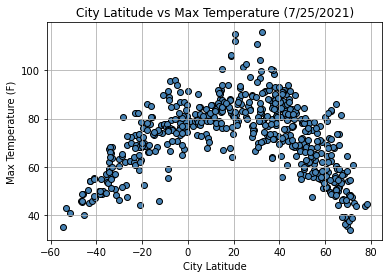

In [13]:
latit = cleancityweather_df["Latitude"]
Max_temp = cleancityweather_df["Max Temperature"]
lattempoutput = '../output_data/TempvsLat.png'
plt.scatter(latit, Max_temp, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()

plt.title (f"City Latitude vs Max Temperature (7/25/2021)")
plt.xlabel ("City Latitude")
plt.ylabel ("Max Temperature (F)")
plt.savefig (lattempoutput)
plt.show()

## Latitude vs. Humidity Plot

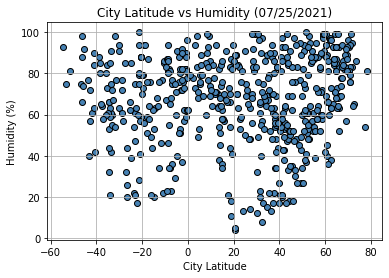

In [14]:
humidity = cleancityweather_df["Humidity"]
lathumoutput = '../output_data/LatvsHum.png'
plt.scatter(latit, humidity, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Humidity (07/25/2021)")
plt.xlabel ("City Latitude")
plt.ylabel ("Humidity (%)")
plt.savefig (lathumoutput)
plt.show()

## Latitude vs. Cloudiness Plot

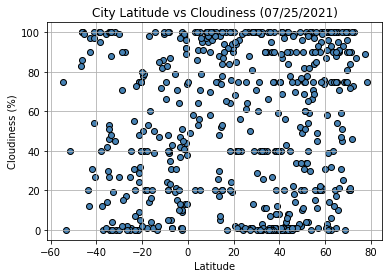

In [15]:
cloudiness = cleancityweather_df["Cloudiness"]
cloudlatoutput = '../output_data/LatvsCloud.png'
plt.scatter(latit, cloudiness, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Cloudiness (07/25/2021)")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.savefig (cloudlatoutput)
plt.show()

## Latitude vs. Wind Speed Plot

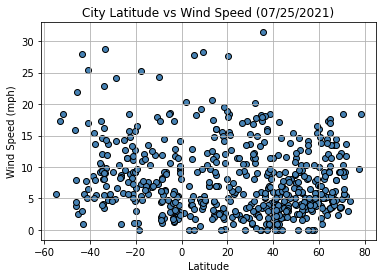

In [16]:
wind = cleancityweather_df["Wind Speed"]
latwindoutput = '../output_data/LatvsWind.png'

plt.scatter(latit, wind, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Wind Speed (07/25/2021)")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (mph)")
plt.savefig (latwindoutput)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4584990621926904


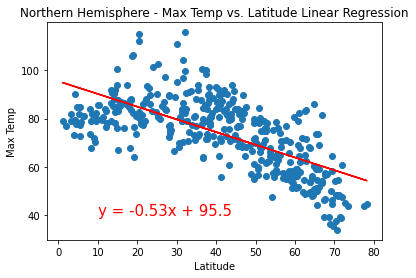

In [17]:
northhem_df = cleancityweather_df[cleancityweather_df["Latitude"]>0]

x_values = northhem_df['Latitude']
y_values = northhem_df['Max Temperature']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (10,40), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title ("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6426530681773055


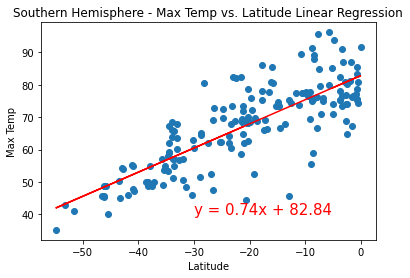

In [18]:
southhem_df = cleancityweather_df[cleancityweather_df["Latitude"]<0]

x_values = southhem_df['Latitude']
y_values = southhem_df['Max Temperature']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-30,40), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title ("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.015825767876616523


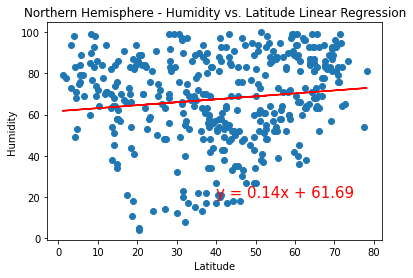

In [19]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title ("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002626592755317063


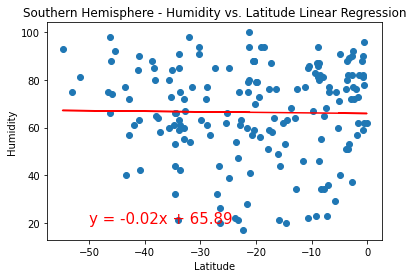

In [20]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-50,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title ("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0008939980825634737


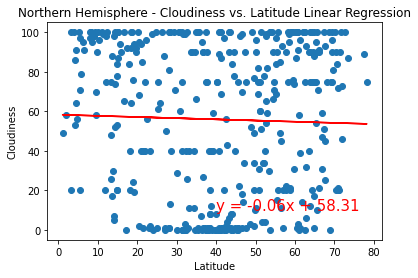

In [21]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,10), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title ("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00779329800801576


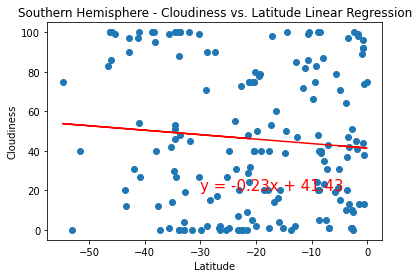

In [22]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-30,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title ("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0026119160161105263


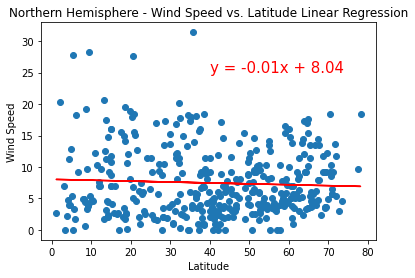

In [23]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,25), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title ("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05822359941855373


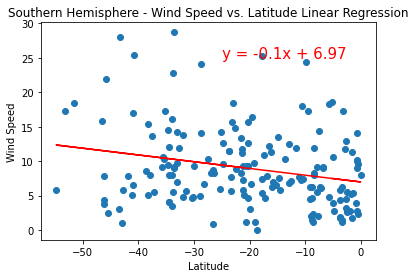

In [25]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-25,25), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title ("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()